In [19]:

import pandas as pd
import numpy as np
# import pandas_datareader as datareader
import matplotlib.pyplot as plt
import datetime
#from matplotlib.finance import candlestick_ohlc
# from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
pd.options.mode.chained_assignment = None  # default='warn'



In [20]:
bayer_data= pd.read_csv('Data/Data Given/BAYZF.csv')
honeywell_data= pd.read_csv('Data/Data Given/HON.csv')
mmm_data= pd.read_csv('Data/Data Given/MMM.csv')
synfin_data= pd.read_csv('Data/Data Given/SYF.csv')


#listed alphabetically, we'll keep this order consistent
all_data = [bayer_data,honeywell_data,mmm_data,synfin_data]

labels = ['Bayer', 'Honeywell', '3M', 'Synchrony Financial']

# clear all na vals
## youll find there are row comprised of all NaN values 
###specifically rows 2516 to 2540
# for data in all_data:
#     df1=data[mmm_data.isnull().any(axis=1)]
#     print(df1.index)
    
for i,data in enumerate(all_data):
    print(data.head())
    all_data[i]=data.dropna(axis=0)
    
for data in all_data:
    df1=data[mmm_data.isnull().any(axis=1)]
    print(df1.index)



        Date       Open       High        Low      Close  Adj Close  Volume
0  2/13/2009  55.549999  55.549999  55.549999  55.549999  44.911427   100.0
1  2/17/2009  53.400002  53.400002  53.099998  53.200001  43.011486   400.0
2  2/18/2009  53.400002  53.400002  53.299999  53.299999  43.092339   300.0
3  2/19/2009  54.250000  54.250000  53.750000  53.750000  43.456146   500.0
4  2/20/2009  52.299999  52.299999  51.900002  51.910000  41.968533   500.0
       Date       Open       High        Low      Close  Adj Close     Volume
0  1/2/2009  31.394459  33.224930  31.003576  33.043789  25.723433  5360700.0
1  1/5/2009  32.862648  33.062855  32.414562  32.872181  25.589838  7326500.0
2  1/6/2009  33.196327  34.702652  33.196327  34.359436  26.747620  7553800.0
3  1/7/2009  33.959023  33.959023  32.586170  32.843578  25.567570  5969900.0
4  1/8/2009  32.624306  32.986584  32.223888  32.986584  25.678898  4573200.0
       Date       Open       High        Low      Close  Adj Close     Volum

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [21]:
# Converting date to pandas datetime format
# %matplotlib inline

# def candlestick_chart(df):
#     df=all_data[1]
#     df['Date'] = pd.to_datetime(df['Date'])
#     df["Date"] = df["Date"].apply(mdates.date2num)

#     # Creating required data in new DataFrame OHLC
#     ohlc= df[['Date', 'Open', 'High', 'Low','Close']]
#     # In case you want to check for shorter timespan
#     # ohlc =ohlc.tail(60)

#     f1, ax = plt.subplots(figsize = (10,5))

#     # plot the candlesticks
#     candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# for i,data in enumerate(all_data):
#     candlestick_chart(data)
#     plt.xlabel('Date')  
#     plt.ylabel('Close Price')  
#     plt.title(labels[i]) 
#     plt.show()

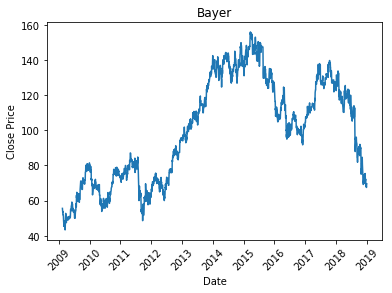

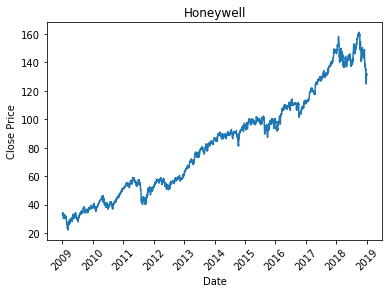

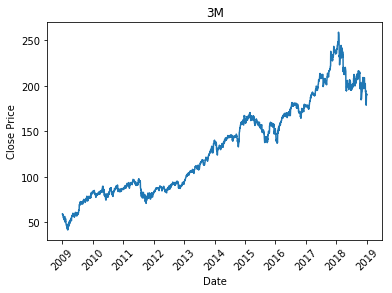

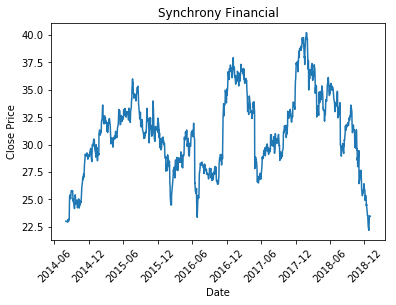

In [38]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d')

for i,data in enumerate(all_data):
    df=data

    df['Date'] = pd.to_datetime(df['Date'])

    # Using matplotlib to add required columns
    plt.plot(df['Date'], df['Close'])
    # Adding labels
    plt.xlabel('Date')
    plt.xticks(rotation=45)
  
    plt.ylabel('Close Price')  
    plt.title(labels[i]) 
  #  plt.savefig(labels[i]+'.png')
    plt.show()



In [ ]:
# GBM Exact Solution

# Parameters
#
# So:     initial stock price
# mu:     returns (drift coefficient)
# sigma:  volatility (diffusion coefficient)
# W:      brownian motion
# T:      time period
# N:      number of increments


#using GBM

    
def daily_return(close):
    returns = []
#    for i in range(0, len(close)-1):
    for i in range(close.index[0],close.index[-1]):
        today = close[i+1]
        yesterday = close[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns



def Brownian(seed, N):
    
    np.random.seed(seed)                         
    dt = 1/N                                    # time step
    b = np.random.normal(0., 1, int(N))*np.sqrt(dt)  # brownian increments
    W = np.cumsum(b)                             # brownian path
    return W, b



def GBM(So, mu, sigma, W, T, N):    
    t = np.linspace(0,1,N+1)
    S = [So]
    for i in range(1,int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

#testing 

mmm_test = pd.read_csv("Data/3m_stock_prices.csv")
bayer_test = pd.read_csv("Data/bayer_stock_prices.csv")
honeywell_test = pd.read_csv("Data/honeywell_stock_prices.csv")
synfin_test = pd.read_csv("Data/synchrony_stock_prices.csv")

all_test = [bayer_test,honeywell_test,mmm_test,synfin_test]




submission = pd.DataFrame({
        "Date": mmm_test['Date'] })




for i,data in enumerate(all_data):
    # last days we will look at to calculate the drift and diffusion
    time_period = 250
    df=all_data[i]
    df=all_data[i].loc[len(df)-(time_period):]
    df=df.set_index(np.arange(len(df)))

    close = df['Close']
    time = np.linspace(1, len(close), len(close))
    ##we need some incremental returns report to get our drift and diffusion coefficient
    returns = daily_return(close)
    mu = np.mean(returns)*len(df)
    sigma = np.std(returns)*np.sqrt(len(df))
    print(mu,sigma)
    seed = 10
    So = close[len(close)-1]      
    N = len(df)
    ind=(np.linspace(1,len(df),32))
    ind=[round(i) for i in ind]
    W = Brownian(seed, N)[0]
    T = 1
    soln = GBM(So, mu, sigma, W, T, N)[0]
    ind_soln=[soln[int(i)] for i in ind]
    submission[labels[i]] = ind_soln
#     plt.plot(pd.to_datetime(submission['Date']),ind_soln)
#     plt.show()
    
    test=(all_test[i])

    time = np.linspace(1, len(test), len(test))
    date = pd.to_datetime(test['Date'])
    
    plt.figure(1)
    plt.plot(date, all_test[i]['Close'], label = 'Actual')
    plt.plot(date, ind_soln, label = 'GBM (Seed = 10)', ls='--')

    plt.ylabel("Cost per Share")
    plt.xlabel("Dates")
    plt.xticks(rotation=45)
    plt.title('Geometric Brownian Motion - '+labels[i])

    plt.legend(loc = 'best')
    plt.show()

submission.to_csv('submission.csv',index=False)



In [ ]:
#attmpeting Monte Carlo simulations on GBM



In [ ]:
#guiding the GBM model using sentiment analysis

